### criando modelo basico para calcular a cruva ROC e a AUC 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
# carregando o conjunto de dados Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Treinar um modelo simples de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Fazer previsões de probabilidade
y_proba = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

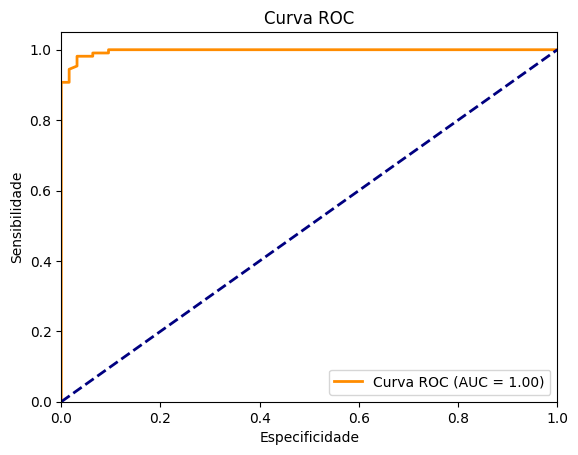

In [30]:
# Plotar a curva ROC e o valor de AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()